In [1]:
import pandas as pd

#read in the data using pandas
df = pd.read_csv('spambase.data', sep=",")

#check data has been read in properly
df.keys()

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [2]:
#check the number of rows and columns in the dataset
df.shape

(4601, 57)

In [3]:
df.describe

<bound method NDFrame.describe of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0.00            0.64               0.64            0.0          0.32   
0.21            0.28               0.50            0.0          0.14   
0.06            0.00               0.71            0.0          1.23   
0.00            0.00               0.00            0.0          0.63   
0.00            0.00               0.00            0.0          0.63   
...              ...                ...            ...           ...   
0.31            0.00               0.62            0.0          0.00   
0.00            0.00               0.00            0.0          0.00   
0.30            0.00               0.30            0.0          0.00   
0.96            0.00               0.00            0.0          0.32   
0.00            0.00               0.65            0.0          0.00   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0.00           0.00     

In [4]:
#create a dataframe with all training data 
X = df.drop(columns=['capital_run_length_total'])

#check that the target variable has been removed
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest
0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [5]:
#separate target values
y = df['capital_run_length_total'].values

#view target values
y[0:]

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

c:\Users\Nisuli Hettiarachchi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9278887923544744

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
#Show first 5 model predictions on the test data
y_pred = knn.predict(X_test)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [10]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.8123370981754996

In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.76981542 0.78586957 0.82391304 0.80543478 0.69347826]
cv_scores mean:0.77570221403956


In [12]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#Use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv = 10, scoring = 'accuracy', return_train_score = False, verbose = 1) 

#fit model to data
knn_gscv.fit(X, y)


Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='accuracy', verbose=1)

In [13]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

In [14]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7891846647175327

In [15]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest
0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


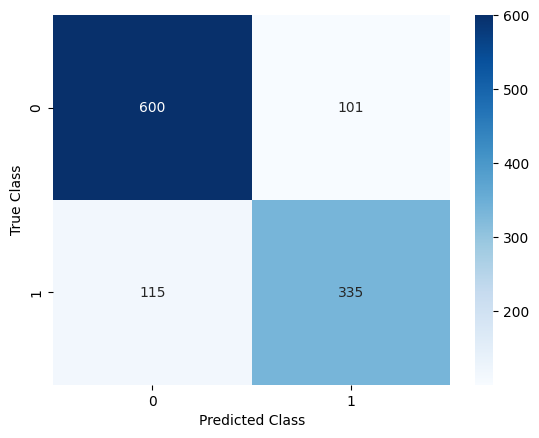

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt = 'd')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [19]:
from sklearn.metrics import classification_report
#Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       701
           1       0.77      0.74      0.76       450

    accuracy                           0.81      1151
   macro avg       0.80      0.80      0.80      1151
weighted avg       0.81      0.81      0.81      1151

